In [21]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
print(tf.__version__)

1.14.0


In [6]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 6s 1us/step


In [24]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
np.min(x_train), np.max(x_train)

(0, 255)

In [26]:
np.min(y_train), np.max(y_train)

(0, 9)

In [66]:
class_labels = ["0 T-shirt/top","1 Trouser","2 Pullover", "3 Dress", "4 Coat","5 Sandal","6 Shirt","7 Sneaker","8 Bag","9 Ankle boot"]
class_labels

['0 T-shirt/top',
 '1 Trouser',
 '2 Pullover',
 '3 Dress',
 '4 Coat',
 '5 Sandal',
 '6 Shirt',
 '7 Sneaker',
 '8 Bag',
 '9 Ankle boot']

# data exploration

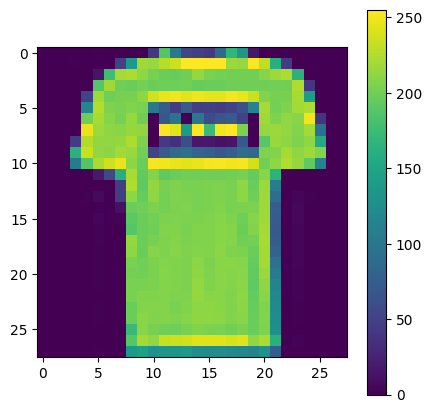

In [32]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[1])
plt.colorbar()
plt.show()

### normalization of data set

In [33]:
x_train = x_train/255.0
x_test = x_test/255.0

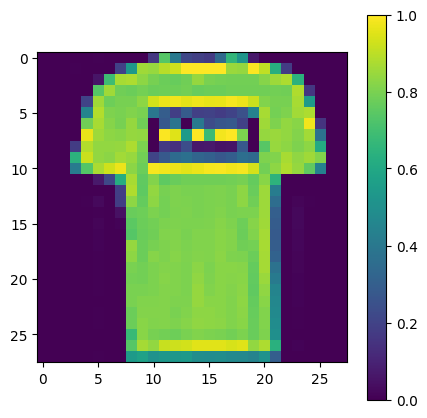

In [34]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[1])
plt.colorbar()
plt.show()

### flattening dataset

In [38]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [41]:
x_train = x_train.reshape(-1, 28*28)  # -1 for all observations
x_test = x_test.reshape(-1, 28*28)

In [42]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## Building a model

In [43]:
model = tf.keras.models.Sequential()
# sequence of layers(fully connected neural network of dense layers)

In [44]:
# Adding first fully connected layer
# units (No of neurons) = 128
# activation function = ReLU
# input shape = (784,)       # vector

model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [45]:
# Adding a second layer with dropout , drop neurons from 20% to 50%
model.add(tf.keras.layers.Dropout(0.3))
# regularization tech to avoid overfitting

In [ ]:
# Adding output layer
# units = 10   # 10 classes
# activation = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Training the model

In [53]:
# compiling the model
# optimizer=adam (minimize the loss fn)
# loss function = sparse_categorical_crossentropy    (guide for optimizer)
# metrics = sparse_categorical_accuracy
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(x_train, y_train, epochs=10)  #images, labels, no of times training of model

Epoch 1/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.5539 - sparse_categorical_accuracy: 0.8045
Epoch 2/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4171 - sparse_categorical_accuracy: 0.8478
Epoch 3/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3849 - sparse_categorical_accuracy: 0.8613
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3672 - sparse_categorical_accuracy: 0.8658
Epoch 5/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3503 - sparse_categorical_accuracy: 0.8710
Epoch 6/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3370 - sparse_categorical_accuracy: 0.8755
Epoch 7/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3295 - sparse_categorical_accuracy: 0.8788
Epoch 8/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.3201 - sparse_categorical_acc

## Model Evaluation

In [56]:
loss, accuracy = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 84us/sample - loss: 0.3420 - sparse_categorical_accuracy: 0.8789


In [57]:
loss, accuracy

(0.34198246264457705, 0.8789)

In [58]:
# model prediction
y_pred = model.predict_classes(x_test)

In [59]:
y_pred[0]                # predicted

9

In [60]:
y_test[0]                # actual

9

In [70]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,856,0,6,38,3,0,88,0,9,0
1,4,960,0,29,4,0,2,0,1,0
2,14,0,755,22,135,0,74,0,0,0
3,17,3,4,933,15,0,23,0,4,1
4,0,0,67,64,804,0,65,0,0,0
5,0,0,0,1,0,953,0,27,0,19
6,169,0,80,41,63,0,635,0,12,0
7,0,0,0,0,0,13,0,966,0,21
8,3,0,2,6,2,4,4,3,976,0
